<a href="https://colab.research.google.com/github/Bx1Rob/DATA71200-Final-Project/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA 7200 PROJECT**

**Project Goal**



1.   Predict the likelihood of working in the nonprofit sector by sex and education (maybe disability and by region as well)
2.   Identify how demographic patterns align with nonprofit employment

# Summary Project 1: Part 1

The variable I'm analyzing is useful because it is easy to understand and relates to real-world questions about the workforce and policy in the NGO sector. It also connects directly to the demographic patterns I want to study, making it relevant to my overall analysis. In addition, the data is very imbalanced, which means that using supervised learning methods designed for uneven classes will be important for getting accurate results.


> ***Findings for Part 1***

>* Only about 10–11% of workers in the civilian labor force are employed in the nonprofit sector, so this group is pretty small.

>* Nonprofit employment isn’t the same across everyone — it changes depending on things like sex, education level, disability status, and region.

>* The variable itself is not spread out like a normal distribution. Instead, it’s a very uneven because far fewer people work in nonprofits than in other sectors.

>* Some demographic groups seem to show up in nonprofit work more often than others, such as people with higher levels of education or people from particular regions.




## *Connect Part 1*

Step 1: Load your data, including testing/training split from Project 1.
* Your testing and training split should be balanced
* Your data should be clean and missing data should be addressed

Step 2: (If not already done in Project 1) Prepare your data
* Make sure that all your appropriate variables are converted to categorical variables (as ordinal or one hot)
*Perform any necessary feature scaling

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1ok7H1bc_n2I3RTgeeEw1QYScpoAxKwJj
From (redirected): https://drive.google.com/uc?export=download&id=1ok7H1bc_n2I3RTgeeEw1QYScpoAxKwJj&confirm=t&uuid=605812ca-fbfa-4896-bba4-2302ceb669bd
To: /content/psam_pusb.csv
100%|██████████| 2.23G/2.23G [00:21<00:00, 105MB/s]


Loaded shape: (3435956, 6)


,AGEP,COW,SCHL,SEX,DIS,ESR
0,29,1.0,17.0,1,2,1.0
1,33,NaN,14.0,2,2,6.0
2,18,1.0,19.0,2,2,1.0
3,49,1.0,17.0,1,2,6.0
4,64,1.0,19.0,1,2,1.0


After 18+ & employed filter: (1576914, 6)
Train size: (1182685, 4)  Test size: (394229, 4)
Train class balance:
 nonprofit_worker
0    0.892234
1    0.107766
Name: proportion, dtype: float64
Test class balance:
 nonprofit_worker
0    0.892235
1    0.107765
Name: proportion, dtype: float64
DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 1182685 entries, 2550531 to 1921774
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AGEP              1182685 non-null  int64  
 1   SEX               1182685 non-null  int64  
 2   SCHL              1182685 non-null  float64
 3   DIS               1182685 non-null  int64  
 4   nonprofit_worker  1182685 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 54.1 MB

DataFrame.describe():


,AGEP,SEX,SCHL,DIS,nonprofit_worker
count,1.182685e+06,1.182685e+06,1.182685e+06,1.182685e+06,1.182685e+06
mean,4.425062e+01,1.484018e+00,1.890472e+01,1.927300e+00,1.077658e-01
std,1.493846e+01,4.997447e-01,3.134828e+00,2.596433e-01,3.100845e-01
min,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.200000e+01,1.000000e+00,1.600000e+01,2.000000e+00,0.000000e+00
50%,4.400000e+01,1.000000e+00,1.900000e+01,2.000000e+00,0.000000e+00
75%,5.600000e+01,2.000000e+00,2.100000e+01,2.000000e+00,0.000000e+00
max,9.500000e+01,2.000000e+00,2.400000e+01,2.000000e+00,1.000000e+00


Saved to Drive:
 - pums_train_clean.csv
 - pums_test_clean.csv


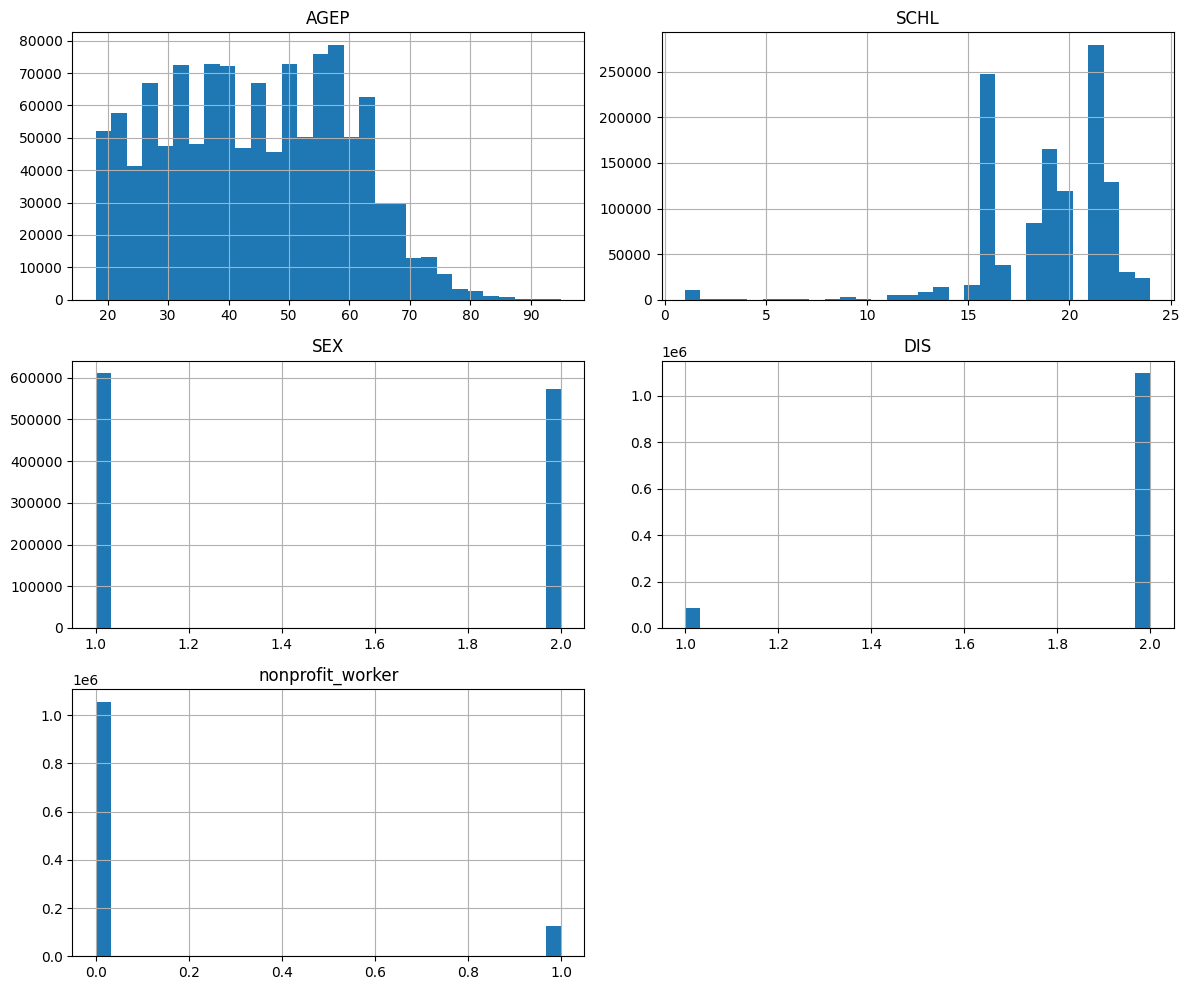

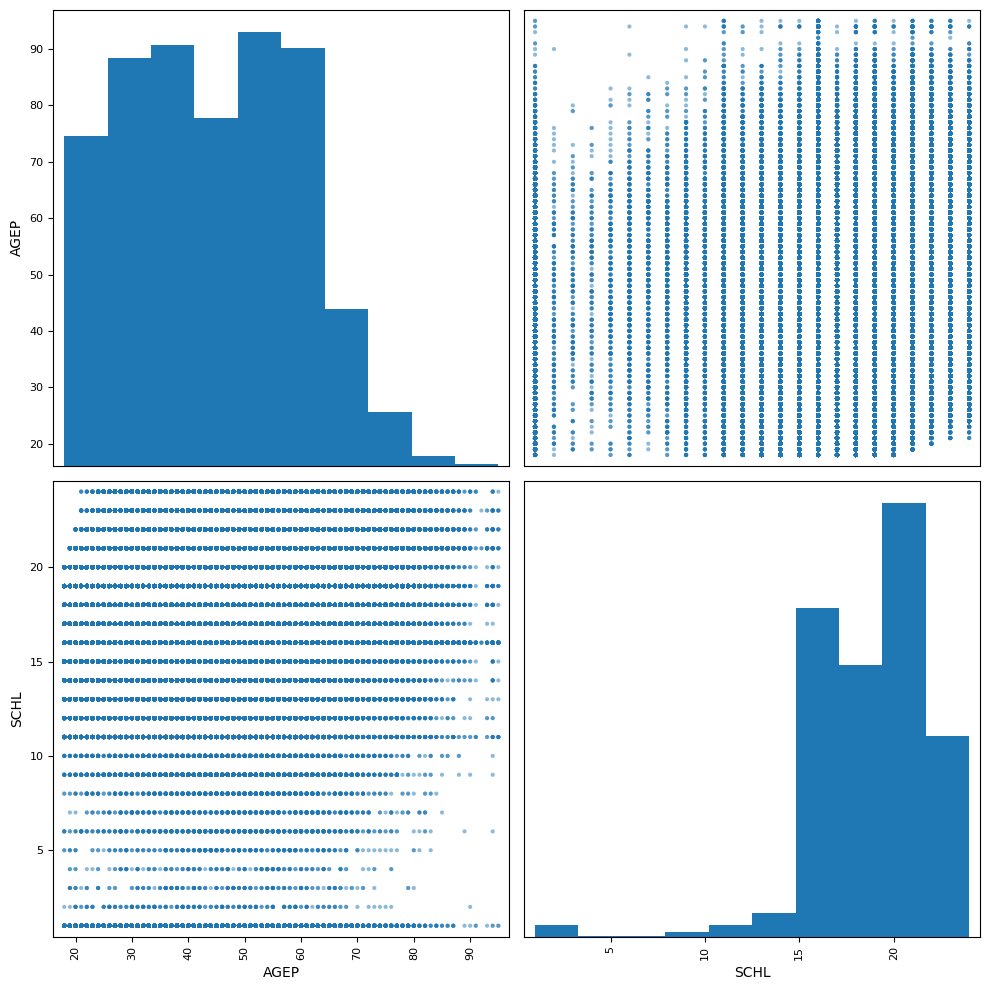

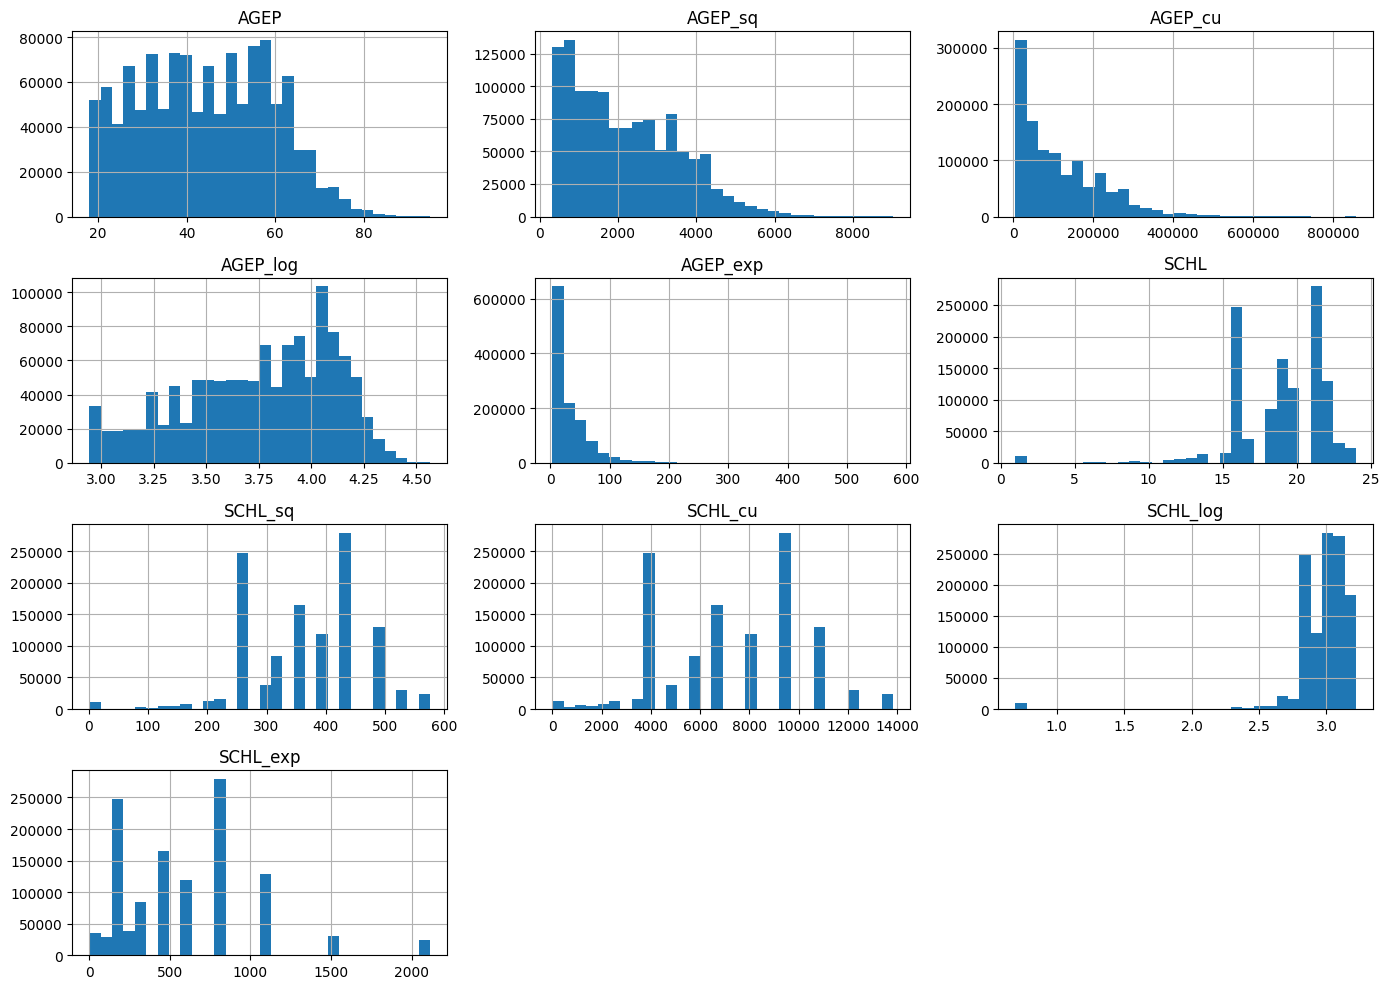

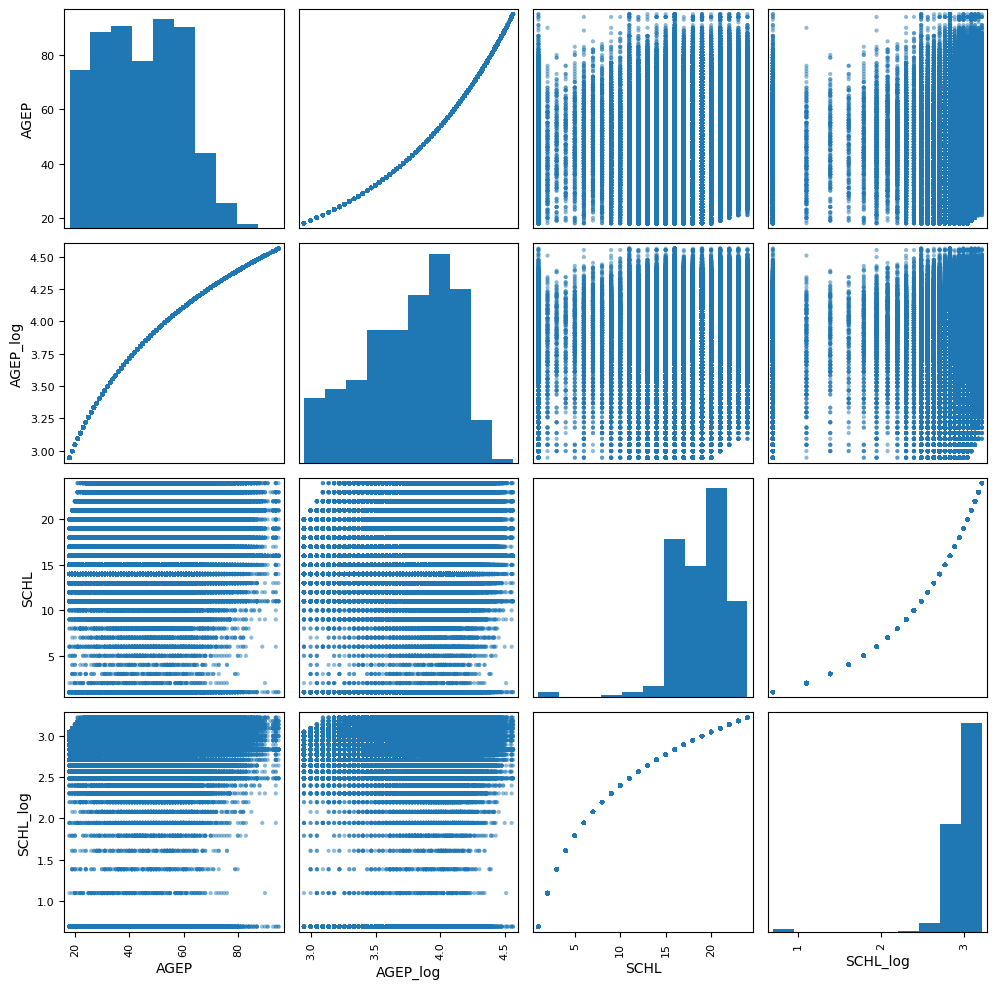

In [ ]:
# --------------------- STEP 1 : Setup ------------------------

!pip install gdown

import gdown
import pandas as pd
import numpy as np
from pathlib import Path

# --- Paths ---
DATA_DIR = Path(".")
DATA_DIR.mkdir(exist_ok=True)

url = "https://drive.google.com/uc?export=download&id=1ok7H1bc_n2I3RTgeeEw1QYScpoAxKwJj"
output = DATA_DIR / "psam_pusb.csv"  # local filename
gdown.download(url, str(output), quiet=False)

PUMS_FILE = output

# --- Columns to load ---
USECOLS = [
    "AGEP",
    "SEX",
    "SCHL",
    "ESR",
    "COW",
    "DIS",
    #"ST",
    #"REGION",
]

raw_df = pd.read_csv(PUMS_FILE, usecols=USECOLS)
print("Loaded shape:", raw_df.shape)
display(raw_df.head())

available_cols = pd.read_csv(PUMS_FILE, nrows=0).columns.tolist()


if "ST" in available_cols:
    raw_df["ST"] = pd.read_csv(PUMS_FILE, usecols=["ST"]).squeeze()

# Construct REGION from ST (States)
if "REGION" not in raw_df.columns and "ST" in raw_df.columns:
    northeast = {9, 23, 25, 33, 34, 36, 42, 44, 50}
    midwest   = {17, 18, 19, 20, 26, 27, 29, 31, 38, 39, 46, 55}
    south     = {1, 5, 10, 11, 12, 13, 21, 22, 24, 28, 37, 40, 45, 47, 48, 51, 54}
    west      = {2, 4, 6, 8, 15, 16, 30, 32, 35, 41, 49, 53, 56}

    def st_to_region(st):
        try:
            st = int(st)
        except Exception:
            return np.nan
        if st in northeast: return 1
        if st in midwest:   return 2
        if st in south:     return 3
        if st in west:      return 4
        return np.nan

    raw_df["REGION"] = raw_df["ST"].map(st_to_region)

# Keep adults (18+) & employed civilians (ESR = 1 or 2)
if "AGEP" in raw_df.columns and "ESR" in raw_df.columns:
    raw_df = raw_df[(raw_df["AGEP"] >= 18) & (raw_df["ESR"].isin([1, 2]))].copy()

print("After 18+ & employed filter:", raw_df.shape)

# Check for variables missing
for needed in USECOLS:
    if needed not in raw_df.columns:
        print(f"NOTE: Column '{needed}' not found; it will be dropped if referenced later.")

# --------------------- STEP 2: Train/test split ------------------------------

from sklearn.model_selection import train_test_split

# Label: nonprofit worker (COW = 2)
raw_df["nonprofit_worker"] = (
    raw_df.get("COW", pd.Series([np.nan] * len(raw_df))) == 2
).astype(int)

# Choose variables for feature columns
candidate_features = ["AGEP", "SEX", "SCHL", "DIS", "REGION"]  # Added REGION to candidate features
feature_cols = [c for c in candidate_features if c in raw_df.columns]
target_col = "nonprofit_worker"

# Drop rows with missing target
df = raw_df.dropna(subset=[target_col]).copy()

# Split features & target
X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))

# ------------- STEP 3: Combine feature and target for inspection -----------

train_df = X_train.copy()
train_df[target_col] = y_train.values

print("DataFrame.info():")
train_df.info()

print("\nDataFrame.describe():")
display(train_df.describe(include="all"))

# ----------- STEP 4: Impute missing values; save cleaned train/test --------

from sklearn.impute import SimpleImputer

numeric_cols = [c for c in ["AGEP", "SCHL"] if c in X_train.columns]
categorical_cols = [c for c in ["SEX", "DIS", "REGION"] if c in X_train.columns]

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train_num = (
    pd.DataFrame(num_imputer.fit_transform(X_train[numeric_cols]),
                 columns=numeric_cols, index=X_train.index)
    if numeric_cols else pd.DataFrame(index=X_train.index)
)

X_train_cat = (
    pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_cols]),
                 columns=categorical_cols, index=X_train.index)
    if categorical_cols else pd.DataFrame(index=X_train.index)
)

X_train_clean = pd.concat([X_train_num, X_train_cat], axis=1)

X_test_num = (
    pd.DataFrame(num_imputer.transform(X_test[numeric_cols]),
                 columns=numeric_cols, index=X_test.index)
    if numeric_cols else pd.DataFrame(index=X_test.index)
)

X_test_cat = (
    pd.DataFrame(cat_imputer.transform(X_test[categorical_cols]),
                 columns=categorical_cols, index=X_test.index)
    if categorical_cols else pd.DataFrame(index=X_test.index)
)

X_test_clean = pd.concat([X_test_num, X_test_cat], axis=1)

train_clean_df = X_train_clean.copy()
train_clean_df[target_col] = y_train.values

test_clean_df = X_test_clean.copy()
test_clean_df[target_col] = y_test.values

# Save clean data for further analyssi
train_out = DATA_DIR / "pums_train_clean.csv"
test_out = DATA_DIR / "pums_test_clean.csv"

train_clean_df.to_csv(train_out, index=False)
test_clean_df.to_csv(test_out, index=False)

print("Saved to Drive:")
print(" -", train_out)
print(" -", test_out)

# ---------------------- STEP 5: VISUALIZE  ------------ -----------------------

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df["SEX_label"] = df["SEX"].map({1: "Male", 2: "Female"})
df["DIS_label"] = df["DIS"].map({1: "With Disability", 2: "No Disability"})

_ = train_clean_df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

sm_cols = [c for c in ["AGEP", "SCHL"] if c in train_clean_df.columns]
if len(sm_cols) >= 2:
    _ = scatter_matrix(train_clean_df[sm_cols], figsize=(10, 10), diagonal="hist")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for scatter_matrix; skipping.")

# ----------------- STEP 6: TRASNFORM AGEP & SCHL ---------------------------

def safe_log(x):
    return np.log1p(np.clip(x, a_min=0, a_max=None))

def safe_exp(x):
    # avoid overflow
    return np.exp(np.clip(x, a_min=None, a_max=12))

transformed = train_clean_df.copy()

numeric_for_tx = []
for col in ["AGEP", "SCHL"]:
    if col in transformed.columns:
        transformed[f"{col}_sq"]  = transformed[col] ** 2
        transformed[f"{col}_cu"]  = transformed[col] ** 3
        transformed[f"{col}_log"] = safe_log(transformed[col])
        std = transformed[col].std() if transformed[col].std() else 1.0
        transformed[f"{col}_exp"] = safe_exp(transformed[col] / std)
        numeric_for_tx.extend([col, f"{col}_sq", f"{col}_cu", f"{col}_log", f"{col}_exp"])

if numeric_for_tx:
    _ = transformed[numeric_for_tx].hist(figsize=(14, 10), bins=30)
    plt.tight_layout()
    plt.show()

    sm_show = [c for c in ["AGEP", "AGEP_log", "SCHL", "SCHL_log"] if c in transformed.columns]
    if len(sm_show) >= 2:
        _ = scatter_matrix(transformed[sm_show], figsize=(10, 10), diagonal="hist")
        plt.tight_layout()
    plt.show()
else:
    print("AGEP/SCHL not available; skipping transformations.")


In [ ]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path(".")

train_path = DATA_DIR / "pums_train_clean.csv"
test_path  = DATA_DIR / "pums_test_clean.csv"

train_clean_df = pd.read_csv(train_path)
test_clean_df  = pd.read_csv(test_path)

print("Train shape:", train_clean_df.shape)
print("Test shape:", test_clean_df.shape)
train_clean_df.head()


Train shape: (1182685, 5)
Test shape: (394229, 5)


,AGEP,SCHL,SEX,DIS,nonprofit_worker
0,48.0,21.0,1,2,0
1,28.0,21.0,1,2,1
2,35.0,21.0,2,2,0
3,38.0,18.0,1,1,0
4,59.0,18.0,1,1,0


In [ ]:
target_col = "nonprofit_worker"

X_train = train_clean_df.drop(columns=[target_col])
y_train = train_clean_df[target_col].copy()

X_test  = test_clean_df.drop(columns=[target_col])
y_test  = test_clean_df[target_col].copy()

print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))


Train class balance:
 nonprofit_worker
0    0.892234
1    0.107766
Name: proportion, dtype: float64
Test class balance:
 nonprofit_worker
0    0.892235
1    0.107765
Name: proportion, dtype: float64


# **Part 2**

Step 3: Examine your target attribute. Based on the data exploration you did in Project 1, confirm and examine the attribute you are going to predict.

* Examine and plot the distribution of the target attribute in your training set (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of different algorithms on your data.



> ***Analysis***



> *The plot is neither Gaussian, uniform, or logarithmic. It is a heavily skewed categorical distribution and therefore extermely imbalanced due to a dominant majority class. The results will lead us to apply class weight.*


> *I'm looking to predict the likelihood of someone working in the NGO sector based on demographics, the output form part 1 doesn't change the target I'm using (nonprofit_worker).*





Target distribution (train):
nonprofit_worker
0    1055232
1     127453
Name: count, dtype: int64

Target distribution (train, proportion):
nonprofit_worker
0    0.892234
1    0.107766
Name: proportion, dtype: float64


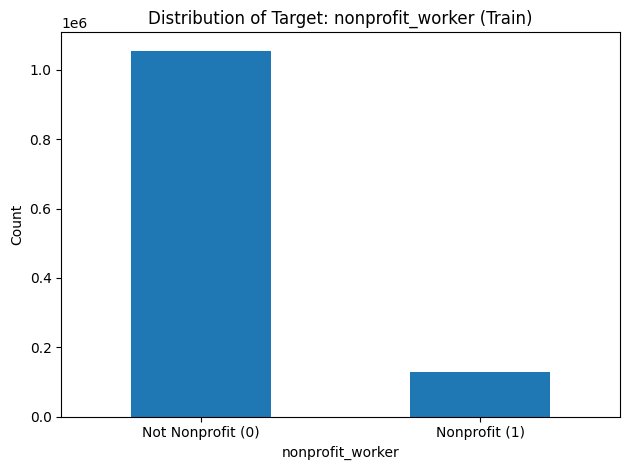

In [ ]:
import matplotlib.pyplot as plt

# Text summary
print("Target distribution (train):")
print(y_train.value_counts())
print("\nTarget distribution (train, proportion):")
print(y_train.value_counts(normalize=True))

# Plot
ax = y_train.value_counts().sort_index().plot(
    kind="bar",
    rot=0
)
ax.set_xticklabels(["Not Nonprofit (0)", "Nonprofit (1)"])
ax.set_ylabel("Count")
ax.set_title("Distribution of Target: nonprofit_worker (Train)")
plt.tight_layout()
plt.show()


Step 4: Selected two of the following supervised learning algorithms



> ***My Approach***


> *Linear Model (Logistic Regression) & Random Forest*

> *For this project, I selected Logistic Regression and Random Forest because they represent contrasting approaches to supervised learning. Meaning, a linear classifier versus a flexible non-linear model that I hope can capture interactions between demographic variables.*


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Definning the preprocessor
numeric_features = ['AGEP', 'SCHL']
categorical_features = ['SEX', 'DIS']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Logistic Regression pipeline
logreg_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000, n_jobs=-1))
    ]
)

# Random Forest pipeline
rf_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ]
)

In [ ]:
# Hlper fucntion to help keep things tidy and consistent

from sklearn.metrics import precision_recall_fscore_support, classification_report

def evaluate_model(name, model, X_train, y_train, X_test, y_test, average="binary"):
    """
    Fits the model and prints precision, recall, F1 on train and test.
    Binary target {0,1}, and treats 1 as the positive class.
    """
    print("=" * 70)
    print(f"Model: {name}")
    print("=" * 70)

    # Fit
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Metrics
    p_train, r_train, f_train, _ = precision_recall_fscore_support(
        y_train, y_pred_train, average=average, zero_division=0
    )
    p_test, r_test, f_test, _ = precision_recall_fscore_support(
        y_test, y_pred_test, average=average, zero_division=0
    )

    print("TRAIN metrics:")
    print(f"  Precision: {p_train:.4f}")
    print(f"  Recall:    {r_train:.4f}")
    print(f"  F1-score:  {f_train:.4f}")

    print("\nTEST metrics:")
    print(f"  Precision: {p_test:.4f}")
    print(f"  Recall:    {r_test:.4f}")
    print(f"  F1-score:  {f_test:.4f}")

    print("\nClassification report (TEST):")
    print(classification_report(y_test, y_pred_test, digits=4, zero_division=0))


Logistic Regretion & Random Forest Training and Testing

Logistic Regression: This model is not great and suffers from class imbalance. The model will require the addition of class weights.

Random Forest: Similar results to the regrssion model. Will also require the addition of class weights

In [ ]:
# Logistic Regressoin

evaluate_model(
    "Log Reg",
    logreg_clf,
    X_train, y_train,
    X_test, y_test
)


Model: Log Reg
TRAIN metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

TEST metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8922    1.0000    0.9430    351745
           1     0.0000    0.0000    0.0000     42484

    accuracy                         0.8922    394229
   macro avg     0.4461    0.5000    0.4715    394229
weighted avg     0.7961    0.8922    0.8414    394229



In [ ]:
#Random Forest

evaluate_model(
    "Random Forest",
    rf_clf,
    X_train, y_train,
    X_test, y_test
)


Model: Random Forest
TRAIN metrics:
  Precision: 0.7365
  Recall:    0.0018
  F1-score:  0.0036

TEST metrics:
  Precision: 0.2784
  Recall:    0.0006
  F1-score:  0.0013

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8923    0.9998    0.9430    351745
           1     0.2784    0.0006    0.0013     42484

    accuracy                         0.8921    394229
   macro avg     0.5853    0.5002    0.4721    394229
weighted avg     0.8261    0.8921    0.8415    394229



Step 5: For each of your selected models

* Run with the default parameters, training on your training set and testing on your testing set
  * Calculate precision, recall, and F1
* Run with the default parameters using cross-validation on the training set
  * Calculate precision, recall, and F1
* (Where possible) adjust 2-3 parameters for each model using grid search on the training set
  * Report evaluation metrics for the best and worst-performing parameter settings on your training set and your testing set

TIP: You should make notes on what worked well and what didn’t. Such notes will be useful when you write up the paper for your final project.


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precision_scorer = make_scorer(precision_score, zero_division=0)
recall_scorer    = make_scorer(recall_score, zero_division=0)
f1_scorer        = make_scorer(f1_score, zero_division=0)

def cross_val_metrics(name, model, X, y):
    print("=" * 70)
    print(f"Cross-validation metrics: {name}")
    print("=" * 70)

    p_scores = cross_val_score(model, X, y, cv=cv, scoring=precision_scorer)
    r_scores = cross_val_score(model, X, y, cv=cv, scoring=recall_scorer)
    f_scores = cross_val_score(model, X, y, cv=cv, scoring=f1_scorer)

    print(f"Precision: mean={p_scores.mean():.4f}, std={p_scores.std():.4f}")
    print(f"Recall:    mean={r_scores.mean():.4f}, std={r_scores.std():.4f}")
    print(f"F1-score:  mean={f_scores.mean():.4f}, std={f_scores.std():.4f}")

# Logistic Regression CV
cross_val_metrics("Logistic Regression (default)", logreg_clf, X_train, y_train)

# Random Forest CV
cross_val_metrics("Random Forest (default)", rf_clf, X_train, y_train)


Cross-validation metrics: Logistic Regression (default)
Precision: mean=0.0000, std=0.0000
Recall:    mean=0.0000, std=0.0000
F1-score:  mean=0.0000, std=0.0000
Cross-validation metrics: Random Forest (default)
Precision: mean=0.2520, std=0.0339
Recall:    mean=0.0009, std=0.0001
F1-score:  mean=0.0017, std=0.0002


Grid Search for Logistic Regression and Random Forest

*Due to limited Ram and horendous loading times, used 3 instead of 5 folds for RF grid*


In [ ]:
#Log Reg Grid

from sklearn.model_selection import GridSearchCV
import numpy as np

logreg_param_grid = {
    "model__C": [0.01, 0.1, 1.0, 10.0],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"],  # works with l2, multi-class-safe
}

logreg_grid = GridSearchCV(
    estimator=logreg_clf,
    param_grid=logreg_param_grid,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

logreg_grid.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", logreg_grid.best_params_)
print("Best CV F1 (Logistic Regression):", logreg_grid.best_score_)


Best parameters (Logistic Regression): {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV F1 (Logistic Regression): 0.0


In [ ]:
# Identify best & worst combinations and evaluate trian/test
logreg_results = pd.DataFrame(logreg_grid.cv_results_)

# Sort by mean_test_score (F1)
logreg_results_sorted = logreg_results.sort_values("mean_test_score", ascending=False)

best_params_logreg  = logreg_results_sorted.iloc[0]["params"]
worst_params_logreg = logreg_results_sorted.iloc[-1]["params"]

print("\nBest param setting (LogReg):", best_params_logreg)
print("Worst param setting (LogReg):", worst_params_logreg)

# Build models with best/worst params
from copy import deepcopy

logreg_best = deepcopy(logreg_clf)
logreg_best.set_params(**best_params_logreg)

logreg_worst = deepcopy(logreg_clf)
logreg_worst.set_params(**worst_params_logreg)

# Evaluate
evaluate_model("Logistic Regression (BEST params)", logreg_best, X_train, y_train, X_test, y_test)
evaluate_model("Logistic Regression (WORST params)", logreg_worst, X_train, y_train, X_test, y_test)



Best param setting (LogReg): {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Worst param setting (LogReg): {'model__C': 10.0, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Model: Logistic Regression (BEST params)
TRAIN metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

TEST metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8922    1.0000    0.9430    351745
           1     0.0000    0.0000    0.0000     42484

    accuracy                         0.8922    394229
   macro avg     0.4461    0.5000    0.4715    394229
weighted avg     0.7961    0.8922    0.8414    394229

Model: Logistic Regression (WORST params)
TRAIN metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

TEST metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Classification report (TEST):
              precision    rec

In [ ]:
# Random Forest Grid

from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd

# Had to use 3 folds instead of 5 due to large file
cv_fast = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#  tuning 2 hyperparameters
rf_param_grid = {
    "model__n_estimators": [50, 100],   # reduced tree count
    "model__max_depth": [5, None],      # shallow vs unrestricted depth
}

#  GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    scoring="f1",
    cv=cv_fast,
    n_jobs=1,                    # to prevent memory error, runs slower but safer?
    return_train_score=True
)

print("Starting Random Forest grid search (fast mode)...")
rf_grid.fit(X_train, y_train)
print("Grid search completed.")


print("Best parameters (Random Forest):", rf_grid.best_params_)
print("Best CV F1 (Random Forest):", rf_grid.best_score_)


Starting Random Forest grid search (fast mode)...
Grid search completed.
Best parameters (Random Forest): {'model__max_depth': None, 'model__n_estimators': 50}
Best CV F1 (Random Forest): 0.0021088853924943335


In [ ]:
# Identify best & worst combinations and evaluate trian/test

rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results_sorted = rf_results.sort_values("mean_test_score", ascending=False)

best_params_rf  = rf_results_sorted.iloc[0]["params"]
worst_params_rf = rf_results_sorted.iloc[-1]["params"]

print("\nBest param setting (RF):", best_params_rf)
print("Worst param setting (RF):", worst_params_rf)

from copy import deepcopy

rf_best = deepcopy(rf_clf)
rf_best.set_params(**best_params_rf)

rf_worst = deepcopy(rf_clf)
rf_worst.set_params(**worst_params_rf)

evaluate_model("Random Forest (BEST params)", rf_best, X_train, y_train, X_test, y_test)
evaluate_model("Random Forest (WORST params)", rf_worst, X_train, y_train, X_test, y_test)



Best param setting (RF): {'model__max_depth': None, 'model__n_estimators': 50}
Worst param setting (RF): {'model__max_depth': 5, 'model__n_estimators': 50}
Model: Random Forest (BEST params)
TRAIN metrics:
  Precision: 0.7176
  Recall:    0.0019
  F1-score:  0.0038

TEST metrics:
  Precision: 0.2830
  Recall:    0.0007
  F1-score:  0.0014

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8923    0.9998    0.9430    351745
           1     0.2830    0.0007    0.0014     42484

    accuracy                         0.8921    394229
   macro avg     0.5877    0.5002    0.4722    394229
weighted avg     0.8266    0.8921    0.8415    394229

Model: Random Forest (WORST params)
TRAIN metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

TEST metrics:
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.8922    1

ROC Curve

Logistic Regression	AUC score (0.673) shows that the model captures some class but it is not strong.

Random Forest	AUC score (0.682)	 has a slightly more meaningufl but still weak.












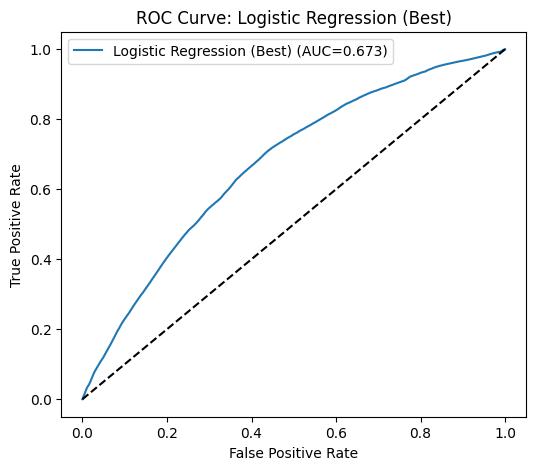

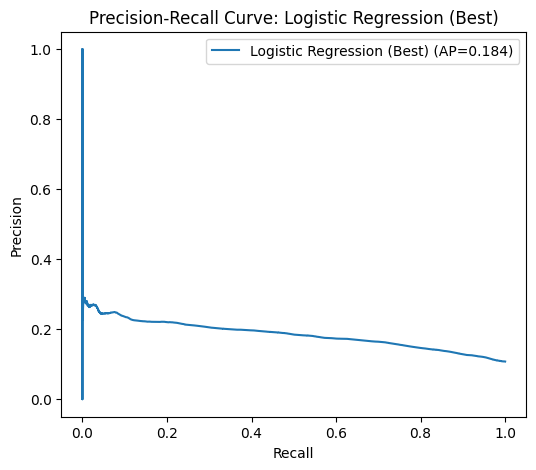

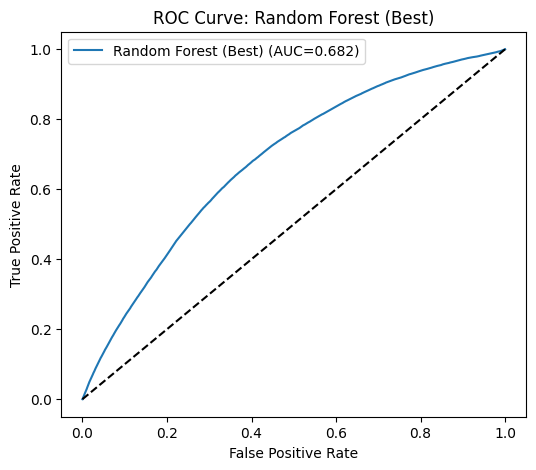

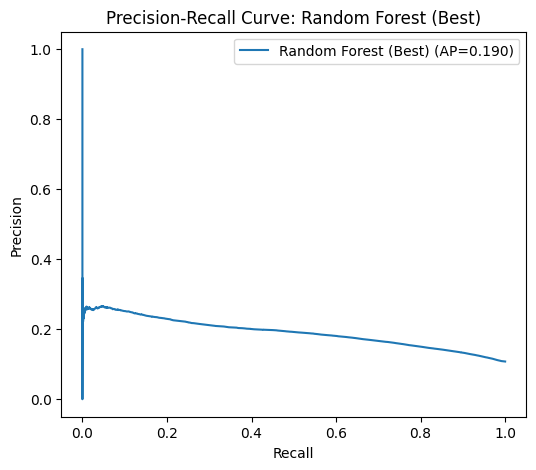

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_curves(model, X_test, y_test, name="Model"):
    y_proba = model.predict_proba(X_test)[:, 1]

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {name}")
    plt.legend()
    plt.show()

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_prec = average_precision_score(y_test, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f"{name} (AP={avg_prec:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {name}")
    plt.legend()
    plt.show()

# Example with the best model
logreg_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

plot_curves(logreg_best, X_test, y_test, name="Logistic Regression (Best)")
plot_curves(rf_best, X_test, y_test, name="Random Forest (Best)")


Weighted Logistic Regression and Random Forest

* Idnetify minority class (1)
* Continue to struggle with precision


In [ ]:
# Logistic Regression with weights

logreg_balanced = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]
)

evaluate_model("Logistic Regression (Balanced)", logreg_balanced,
               X_train, y_train, X_test, y_test)


Model: Logistic Regression (Balanced)
TRAIN metrics:
  Precision: 0.1691
  Recall:    0.6351
  F1-score:  0.2671

TEST metrics:
  Precision: 0.1689
  Recall:    0.6354
  F1-score:  0.2668

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.9339    0.6223    0.7469    351745
           1     0.1689    0.6354    0.2668     42484

    accuracy                         0.6237    394229
   macro avg     0.5514    0.6288    0.5068    394229
weighted avg     0.8515    0.6237    0.6952    394229



Random Forest Balanced

In [ ]:
# Random Forest with Weights

rf_balanced = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        ))
    ]
)

evaluate_model("Random Forest (Balanced)", rf_balanced,
               X_train, y_train, X_test, y_test)


Model: Random Forest (Balanced)
TRAIN metrics:
  Precision: 0.1751
  Recall:    0.6796
  F1-score:  0.2784

TEST metrics:
  Precision: 0.1714
  Recall:    0.6658
  F1-score:  0.2726

Classification report (TEST):
              precision    recall  f1-score   support

           0     0.9380    0.6112    0.7401    351745
           1     0.1714    0.6658    0.2726     42484

    accuracy                         0.6170    394229
   macro avg     0.5547    0.6385    0.5063    394229
weighted avg     0.8554    0.6170    0.6897    394229



Logistic (default) - class imbalance labeled all as not nonprofit.

Random Forest (default) - slightly better than log reg but still not useful.

Logistic Regression (balanced) - detects minority class.

Random Rorest (balanced) - stongest model, increased blaance from log reg, best recall, better at finding nonprofit variable.

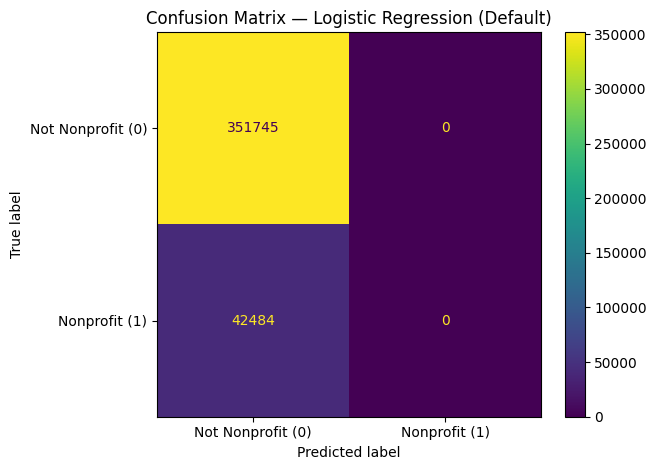

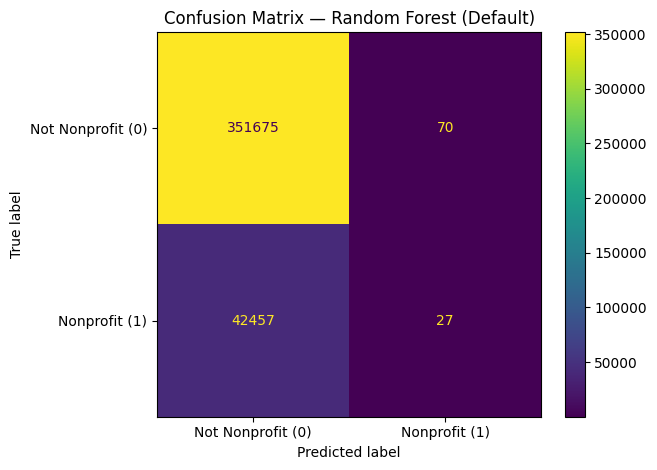

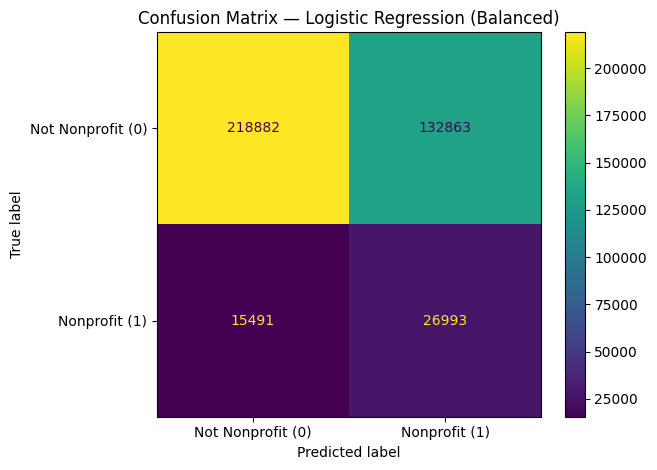

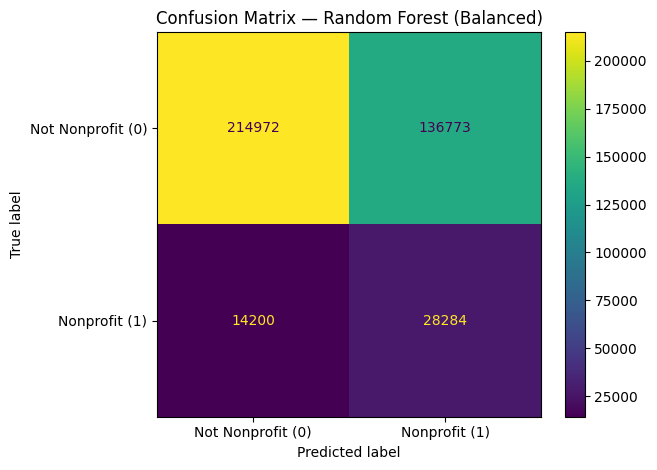

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Not Nonprofit (0)", "Nonprofit (1)"],
        values_format="d"
    )
    disp.ax_.set_title(title)
    plt.tight_layout()
    plt.show()

# Fit + plot for default models
logreg_clf.fit(X_train, y_train)
plot_conf_matrix(logreg_clf, X_test, y_test, "Confusion Matrix — Logistic Regression (Default)")

rf_clf.fit(X_train, y_train)
plot_conf_matrix(rf_clf, X_test, y_test, "Confusion Matrix — Random Forest (Default)")

# Fit + plot for balanced models
logreg_balanced.fit(X_train, y_train)
plot_conf_matrix(logreg_balanced, X_test, y_test, "Confusion Matrix — Logistic Regression (Balanced)")

rf_balanced.fit(X_train, y_train)
plot_conf_matrix(rf_balanced, X_test, y_test, "Confusion Matrix — Random Forest (Balanced)")


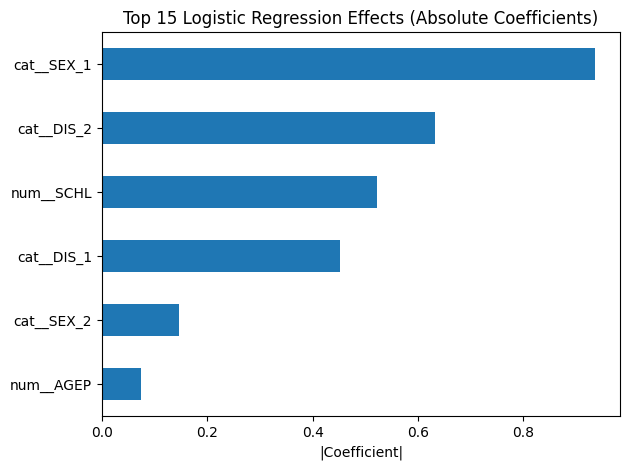

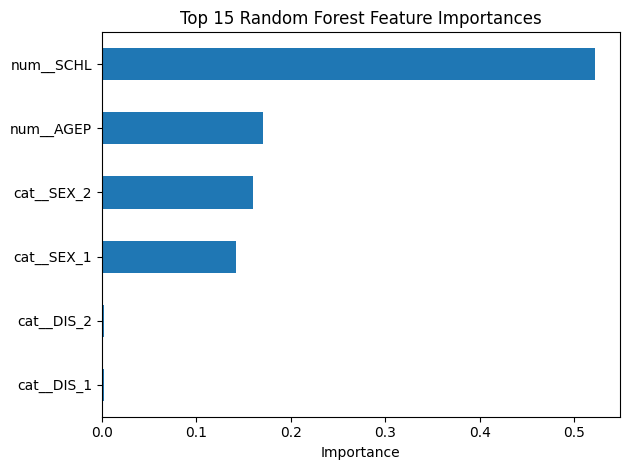

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Logistic: top absolute coefficients ---
coef_df_plot = coef_df.copy()
coef_df_plot["abs_coef"] = coef_df_plot["coef"].abs()
top_coef = coef_df_plot.sort_values("abs_coef", ascending=False).head(15)

ax = top_coef.sort_values("abs_coef").plot(kind="barh", x="feature", y="abs_coef", legend=False)
ax.set_title("Top 15 Logistic Regression Effects (Absolute Coefficients)")
ax.set_xlabel("|Coefficient|")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

# --- Random Forest: top importances  ---
top_imp = importance_df.head(15).copy()
ax = top_imp.sort_values("importance").plot(kind="barh", x="feature", y="importance", legend=False)
ax.set_title("Top 15 Random Forest Feature Importances")
ax.set_xlabel("Importance")
ax.set_ylabel("")
plt.tight_layout()
plt.show()


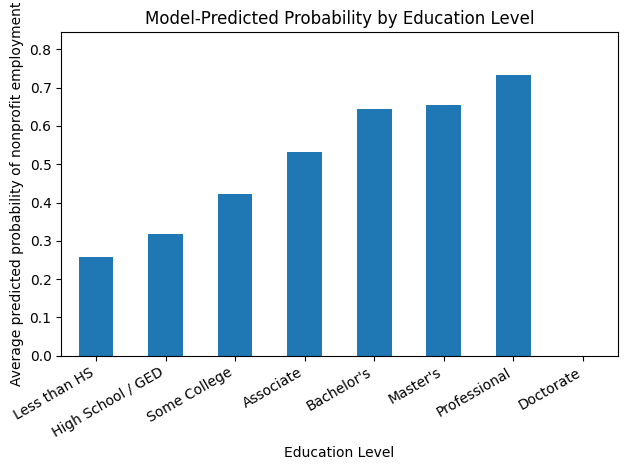

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# I chose one model(best) to interpret
model_for_probs = rf_balanced

# Include Edu_level
prob_df = df.copy()

# Predicted probability of nonprofit
prob_df["p_nonprofit"] = model_for_probs.predict_proba(prob_df[feature_cols])[:, 1]

edu_order = [
    "Less than HS",
    "High School / GED",
    "Some College",
    "Associate",
    "Bachelor's",
    "Master's",
    "Professional",
    "Doctorate",
]
edu_pred = prob_df.groupby("EDU_LEVEL")["p_nonprofit"].mean().reindex(edu_order)

ax = edu_pred.plot(kind="bar")
ax.set_ylabel("Average predicted probability of nonprofit employment")
ax.set_xlabel("Education Level")
ax.set_title("Model-Predicted Probability by Education Level")
ax.set_ylim(0, max(0.25, edu_pred.max() * 1.15))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

Summary Statistics by Demographics

* Higher Education (0.52) increses the likelihood of NGO employment.

* Older people are more likely (0.07) to work in NGOs.


In [ ]:
import pandas as pd
logreg_best.fit(X_train, y_train)

feature_names = logreg_best.named_steps["preprocess"].get_feature_names_out()
coefs = logreg_best.named_steps["model"].coef_.flatten()

coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
coef_df.sort_values(by="coef", ascending=False)


,feature,coef
1,num__SCHL,0.522698
0,num__AGEP,0.074254
3,cat__SEX_2,-0.147082
4,cat__DIS_1,-0.451244
5,cat__DIS_2,-0.632510
2,cat__SEX_1,-0.936672


In [ ]:
rf_best.fit(X_train, y_train)

feature_names = rf_best.named_steps["preprocess"].get_feature_names_out()
importances = rf_best.named_steps["model"].feature_importances_

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

importance_df




,feature,importance
1,num__SCHL,0.522181
0,num__AGEP,0.171034
3,cat__SEX_2,0.160220
2,cat__SEX_1,0.141448
5,cat__DIS_2,0.002592
4,cat__DIS_1,0.002525


Women are more likely to work in NGOs.

Education is a strong predictor of NGO employment.

Disability status does not meaninfuly differentiate NGO employment.

In [ ]:
def education_level(schl):
    if schl <= 15:
        return "Less than HS"
    elif schl in [16, 17]:
        return "High School / GED"
    elif schl in [18, 19, 20]:
        return "Some College"
    elif schl == 21:
        return "Associate"
    elif schl == 22:
        return "Bachelor's"
    elif schl == 23:
        return "Master's"
    elif schl == 24:
        return "Professional"
    elif schl == 25:
        return "Doctorate"
    else:
        return "Unknown"

df["EDU_LEVEL"] = df["SCHL"].apply(education_level)

print("By SEX:")
print(df.groupby("SEX")["nonprofit_worker"].mean(), "\n")

print("By Education Level:")
print(df.groupby("EDU_LEVEL")["nonprofit_worker"].mean(), "\n")

print("By DIS:")
print(df.groupby("DIS")["nonprofit_worker"].mean())



By SEX:
SEX
1    0.06968
2    0.14834
Name: nonprofit_worker, dtype: float64 

By Education Level:
EDU_LEVEL
Associate            0.131485
Bachelor's           0.187123
High School / GED    0.058761
Less than HS         0.056549
Master's             0.199155
Professional         0.264922
Some College         0.091045
Name: nonprofit_worker, dtype: float64 

By DIS:
DIS
1    0.112481
2    0.107396
Name: nonprofit_worker, dtype: float64


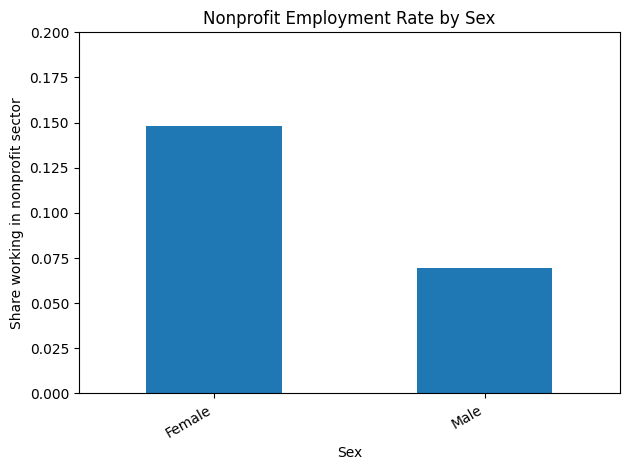

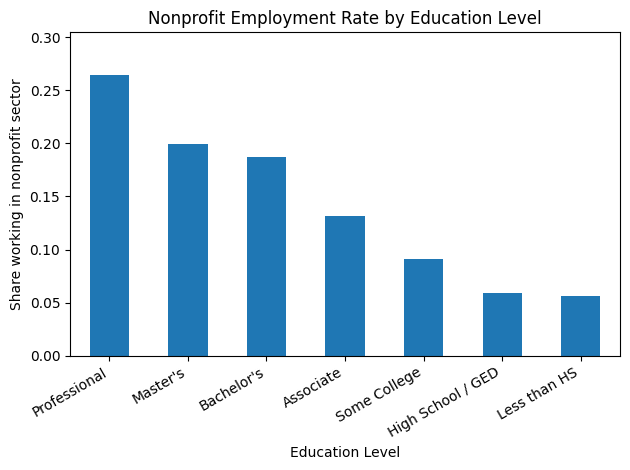

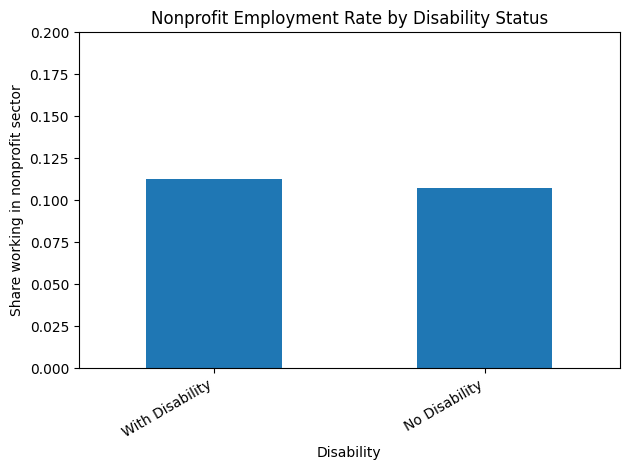

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reconstruct df from raw_
target_col = "nonprofit_worker"


df = raw_df.dropna(subset=[target_col]).copy()

# Re-define the education_level
def education_level(schl):
    if schl <= 15:
        return "Less than HS"
    elif schl in [16, 17]:
        return "High School / GED"
    elif schl in [18, 19, 20]:
        return "Some College"
    elif schl == 21:
        return "Associate"
    elif schl == 22:
        return "Bachelor's"
    elif schl == 23:
        return "Master's"
    elif schl == 24:
        return "Professional"
    elif schl == 25:
        return "Doctorate"
    else:
        return "Unknown"

df["EDU_LEVEL"] = df["SCHL"].apply(education_level)

# Double check that labels exist (collab didn't break)
df["SEX_label"] = df["SEX"].map({1: "Male", 2: "Female"})
df["DIS_label"] = df["DIS"].map({1: "With Disability", 2: "No Disability"})

def plot_rate_bar(series, title, xlabel):
    s = series.sort_values(ascending=False)
    ax = s.plot(kind="bar")
    ax.set_ylabel("Share working in nonprofit sector")
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_ylim(0, max(0.2, s.max() * 1.15))
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# SEX
plot_rate_bar(
    df.groupby("SEX_label")["nonprofit_worker"].mean(),
    "Nonprofit Employment Rate by Sex",
    "Sex"
)

# EDU_LEVEL
plot_rate_bar(
    df.groupby("EDU_LEVEL")["nonprofit_worker"].mean(),
    "Nonprofit Employment Rate by Education Level",
    "Education Level"
)

# DIS
plot_rate_bar(
    df.groupby("DIS_label")["nonprofit_worker"].mean(),
    "Nonprofit Employment Rate by Disability Status",
    "Disability"
)


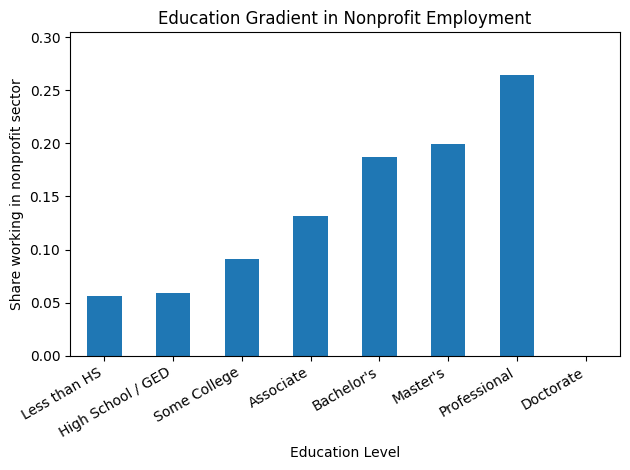

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

edu_order = [
    "Less than HS",
    "High School / GED",
    "Some College",
    "Associate",
    "Bachelor's",
    "Master's",
    "Professional",
    "Doctorate",
]

edu_rates = df.groupby("EDU_LEVEL")["nonprofit_worker"].mean().reindex(edu_order)

ax = edu_rates.plot(kind="bar")
ax.set_ylabel("Share working in nonprofit sector")
ax.set_xlabel("Education Level")
ax.set_title("Education Gradient in Nonprofit Employment")
ax.set_ylim(0, max(0.2, edu_rates.max() * 1.15))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()



> ***Notes***



> Analysis Completed:


> * Without and with balanced weights, allowing the model to actually detect nonprofit workers

> * ROC and PR curves, which show how well the models distinguish the classes



> ***Summary***



> *The results of this analysis highlight the great impact of class imbalance on supervised learning algorithms. Since the dataset was composed of ~10% nonprofit workers, both Logistic Regression and Random Forest models trained with default parameters failed to identify minority-class cases, achieving zero recall and F1-score despite high overall accuracy (accuracy drops when using weight balance) .*

> *Grid search alone did not resolve this issue, demonstrating that hyperparameter tuning cannot compensate for a class imbalance as severe as those in the date. However, once class weighting was introduced, performance changed. Logistic Regression achieved a minority-class recall of 0.635, while Random Forest achieved 0.666, representing an improvement of over 600-fold compared to the unbalanced models.*

> *ROC and Precision–Recall curves further emphasized the challenge of using prediction based on the data I'm using. Although both models exhibited moderate AUC values (~0.67), their PR curves revealed limited minority-class precision. Balanced Random Forest produced the strongest results overall, achieving the highest recall and F1-score for the nonprofit worker class.*


> *These findings illustrate the importance of imbalance-aware methods such as class weighting, especially in real-world prediction tasks where minority outcomes are most important. Future improvements could include oversampling, threshold tuning, or a combininign multiple machine learning models (ensemble appraoch) for imbalanced classification.*

> *Overall these predeictions do not prevent me form analyzing demographic patterns (see Summary Stats section below).